In [6]:
import os
import pickle
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the current working directory
current_dir = os.getcwd()
print("Current working directory:", current_dir)

# Construct the path to the model and pickle files
model_path = os.path.join(current_dir, '..', 'chatbot', 'chatbot_model.h5')
words_path = os.path.join(current_dir, '..', 'chatbot', 'words.pkl')
classes_path = os.path.join(current_dir, '..', 'chatbot', 'classes.pkl')

# Load the model and pickle files
model = load_model(model_path)
words = pickle.load(open(words_path, 'rb'))
classes = pickle.load(open(classes_path, 'rb'))


Current working directory: c:\Users\Jbaru\OneDrive\Documents\MEGA\Work_projects\chatbot_project\notebooks


In [11]:
# Generate synthetic test data that covers all classes
num_classes = len(classes)
test_x = np.random.randint(0, 2, (num_classes * 10, len(words)))  # 10 examples per class
test_y = np.repeat(np.arange(num_classes), 10)  # Repeat each class label 10 times




In [12]:
# Predictions using the model
predictions = model.predict(test_x)
predicted_labels = np.argmax(predictions, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step


In [13]:
# Generate classification report
report = classification_report(test_y, predicted_labels, target_names=classes)
print(report)

                                       precision    recall  f1-score   support

           academic_success_resources       0.00      0.00      0.00        10
                      acceptance_info       0.50      0.10      0.17        10
          admission_test_for_under_19       0.00      0.00      0.00        10
    advanced_standing_credit_transfer       0.02      0.10      0.04        10
                    after_application       0.00      0.00      0.00        10
                 application_deadline       0.00      0.00      0.00        10
            application_deadline_intl       0.00      0.00      0.00        10
                  application_process       0.00      0.00      0.00        10
                           apply_intl       0.00      0.00      0.00        10
                    campus_facilities       0.00      0.00      0.00        10
                        campus_number       0.00      0.00      0.00        10
                          campus_tour       0.00   

c:\Users\Jbaru\.virtualenvs\chatbot_project-E3JRPTJF\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jbaru\.virtualenvs\chatbot_project-E3JRPTJF\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jbaru\.virtualenvs\chatbot_project-E3JRPTJF\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

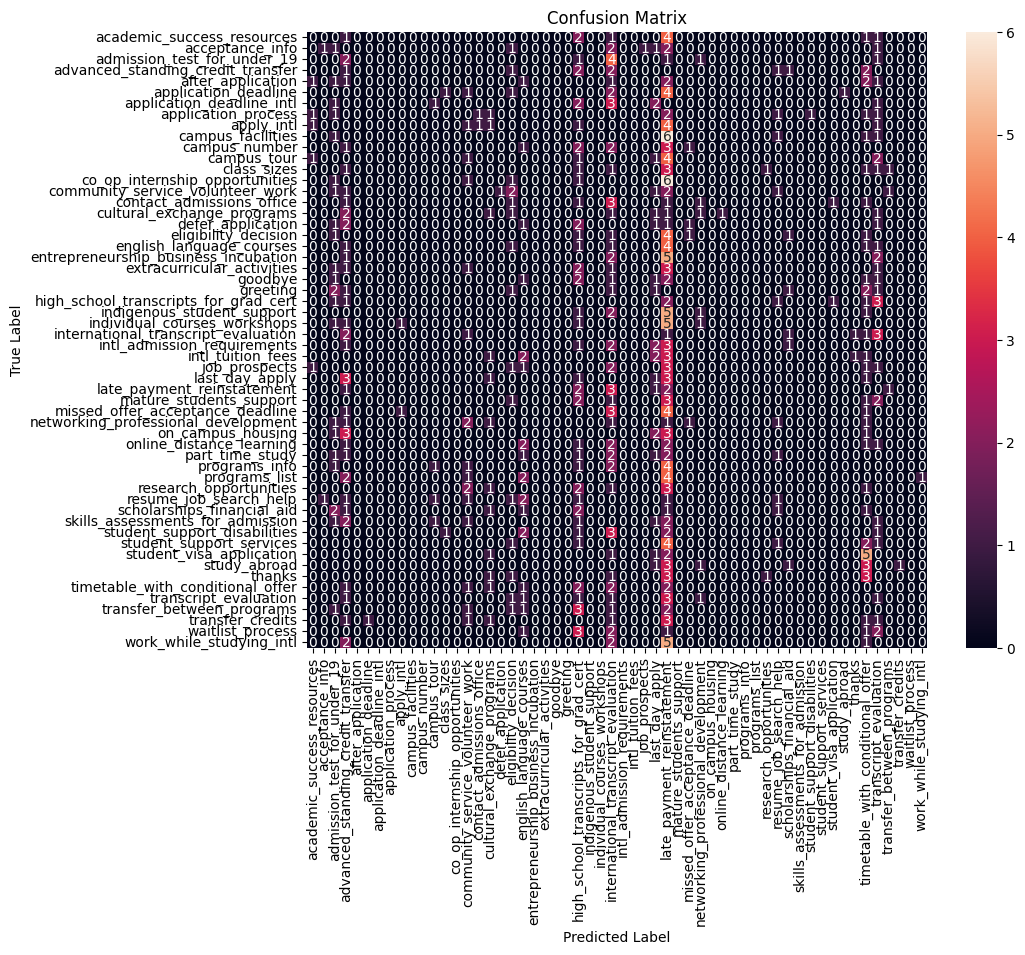

In [15]:
# Plotting the confusion matrix
conf_matrix = confusion_matrix(test_y, predicted_labels)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
# Make sure the 'images' directory exists; if not, create it
if not os.path.exists('images'):
    os.makedirs('images')

# Save the plot to the desired folder
plt.savefig('images/confusion_matrix.png', bbox_inches='tight', dpi=300)  # Adjust path as necessary
plt.show()